In [ ]:
#import the required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the dataset

In [2]:
df=pd.read_csv("C:/Users/ADMIN/Desktop/placement-dataset.csv")

In [3]:
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [4]:
df.tail()

,city,cgpa,iq,placement
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1
99,New York,6.2,113.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       92 non-null     float64
 2   iq         96 non-null     float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


In [ ]:
#checking for missing values

In [6]:
df.isnull().sum()

city         0
cgpa         8
iq           4
placement    0
dtype: int64

In [ ]:
#Handling the missing values

In [7]:
df['cgpa']=df['cgpa'].fillna(df['cgpa'].median())

In [8]:
df['iq']=df['iq'].fillna(df['iq'].median())

In [9]:
df.isnull().sum()

city         0
cgpa         0
iq           0
placement    0
dtype: int64

In [10]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

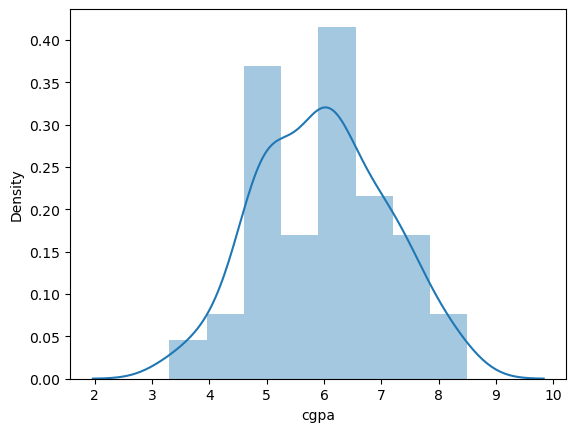

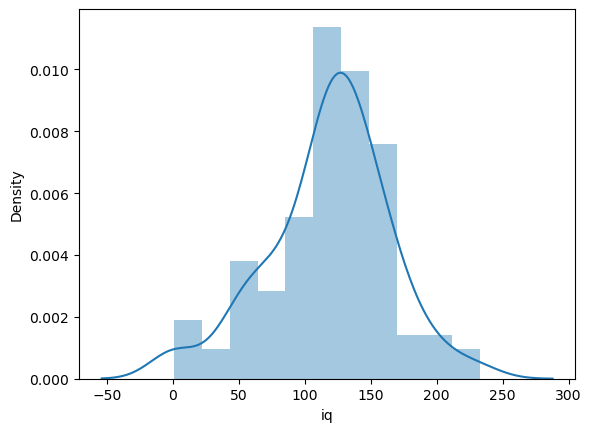

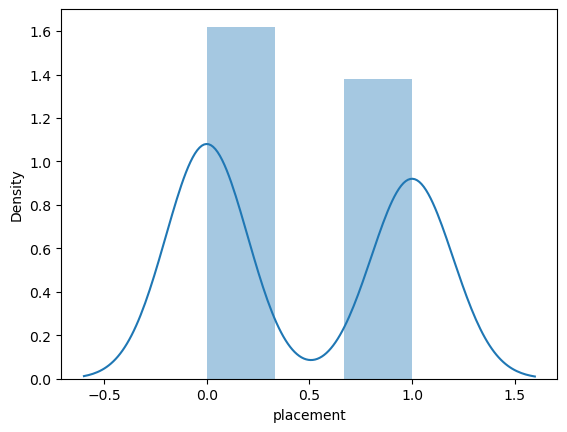

In [11]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

In [ ]:
#Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['city']=encoder.fit_transform(df['city'])

In [ ]:
#Splitting data into Feature and target column

In [13]:
x=df.iloc[:,0:3]

In [14]:
x

,city,cgpa,iq
0,2,6.8,123.0
1,1,5.9,106.0
2,0,6.0,121.0
3,2,7.4,132.0
4,1,5.8,142.0
...,...,...,...
95,0,4.3,200.0
96,2,4.4,42.0
97,1,6.7,182.0
98,0,6.3,103.0


In [15]:
y=df.iloc[:,3]

In [16]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
#Build a logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [20]:
yhat=lr.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy :', accuracy_score(y_test,yhat))

Accuracy : 0.85


In [ ]:
#Using Support Vendor Machine(SVM)

In [22]:
from sklearn import svm
c2=svm.SVC(kernel='linear')
c2.fit(x_train,y_train)
yhat2=c2.predict(x_test)
print('Accuracy:',accuracy_score(y_test,yhat2))

Accuracy: 0.85


In [ ]:
#The logistic Regression  model and SVM achieved an acuuracy of 85% on the dataset.